# Demonstrating the Wolfson Bipolarization Coefficient:


-------------------------

### 1. Imports & Input Data

In [159]:
from inequality.wolfson import wolfson


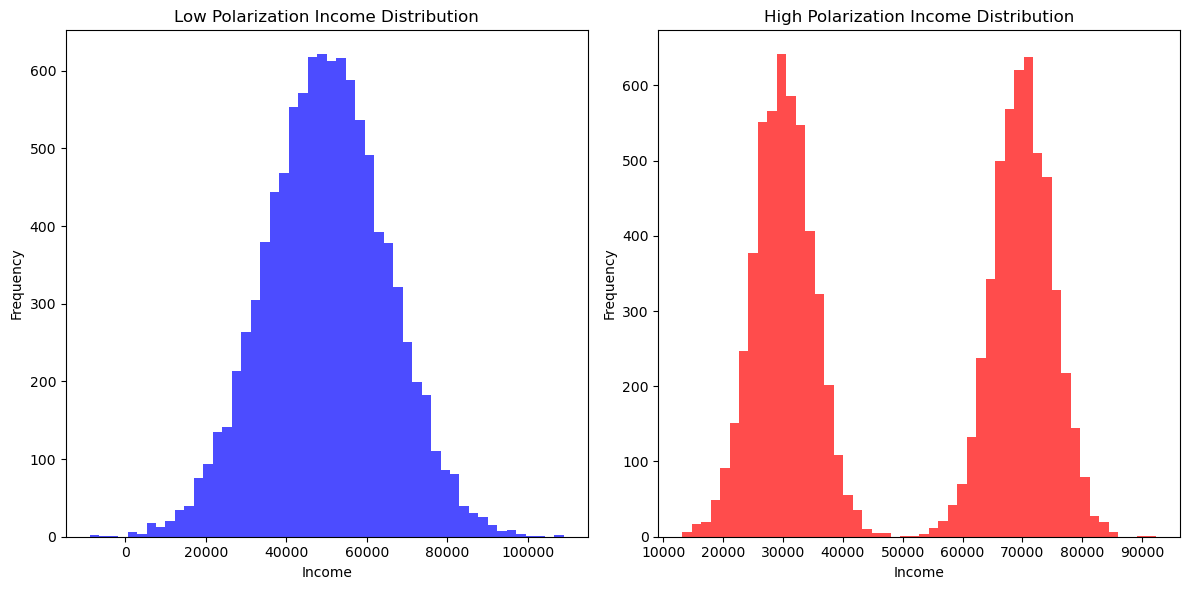

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Distribution 1: Low polarization (normal distribution)
income_low_polarization = np.random.normal(loc=50000, scale=15000, size=10000)

# Distribution 2: High polarization (bimodal distribution)
income_high_polarization = np.concatenate([
    np.random.normal(loc=30000, scale=5000, size=5000),
    np.random.normal(loc=70000, scale=5000, size=5000)
])

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot for low polarization
plt.subplot(1, 2, 1)
plt.hist(income_low_polarization, bins=50, color='blue', alpha=0.7)
plt.title('Low Polarization Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Plot for high polarization
plt.subplot(1, 2, 2)
plt.hist(income_high_polarization, bins=50, color='red', alpha=0.7)
plt.title('High Polarization Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()


In [161]:
wolfson(income_high_polarization)

np.float64(0.17571224182763848)

In [162]:
wolfson(income_low_polarization)

np.float64(0.07016937981819878)

In [163]:
import geopandas
import inequality
import libpysal


In [164]:
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

In [165]:
wolfson(gdf.PCGDP1960)

np.float64(0.11070986960431652)

In [166]:

w = libpysal.weights.Queen.from_dataframe(gdf)
w.transform = 'r'

/tmp/ipykernel_2534197/4115592875.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(gdf)


In [167]:
l60 = libpysal.weights.lag_spatial(w, gdf.PCGDP1960)

In [168]:
wolfson(l60)

np.float64(0.07039175526018514)

In [169]:
import numpy as np

In [170]:
r60 = np.random.permutation(gdf.PCGDP1960)

In [171]:
lr60 = libpysal.weights.lag_spatial(w, r60)
wolfson(lr60)

np.float64(0.05767316232696517)

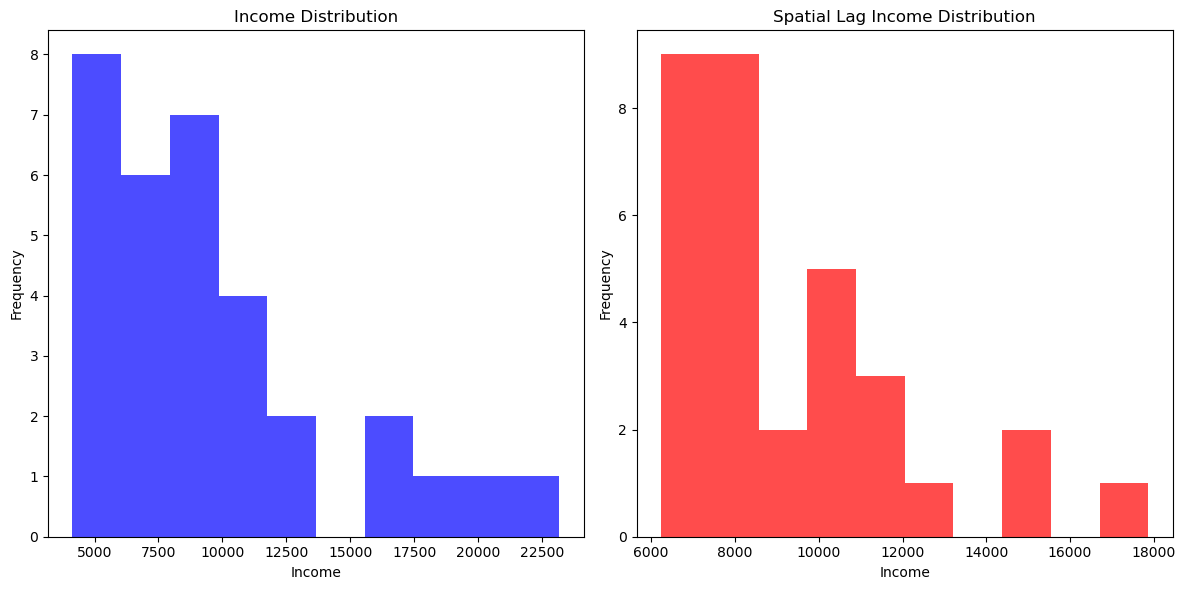

In [172]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

bins=10

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Plot for low polarization
plt.subplot(1, 2, 1)
plt.hist(gdf.PCGDP1960, bins=bins, color='blue', alpha=0.7)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Plot for high polarization
plt.subplot(1, 2, 2)
plt.hist(l60, bins=bins, color='red', alpha=0.7)
plt.title('Spatial Lag Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()


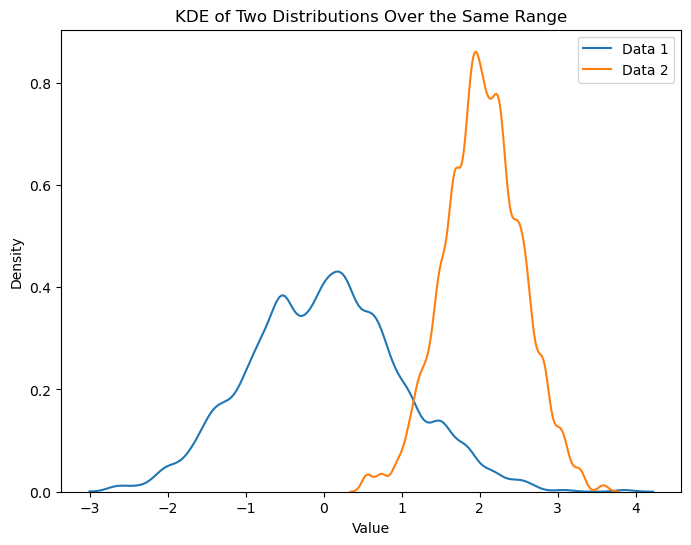

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate two sets of random data
data1 = np.random.normal(0, 1, size=1000)
data2 = np.random.normal(2, 0.5, size=1000)

# Set the same range for both KDE plots
common_range = (-3, 5)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the first KDE
sns.kdeplot(data1, label='Data 1', bw_adjust=0.5, clip=common_range)

# Plot the second KDE
sns.kdeplot(data2, label='Data 2', bw_adjust=0.5, clip=common_range)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE of Two Distributions Over the Same Range')
plt.legend()

# Show the plot
plt.show()


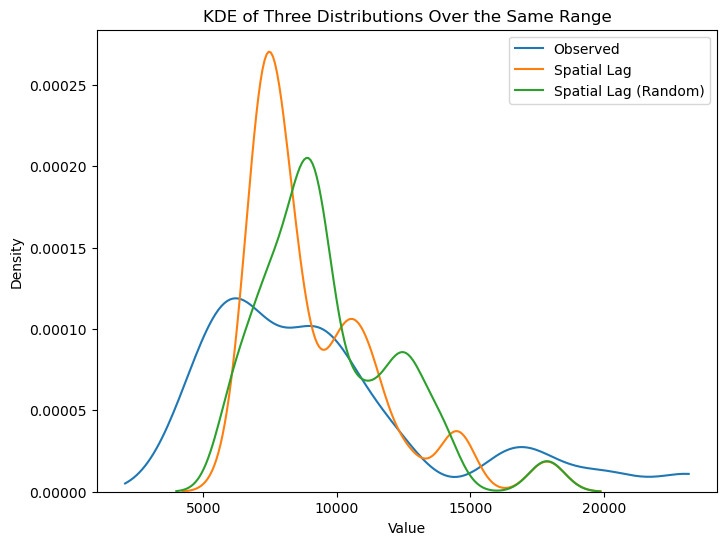

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate two sets of random data
data1 = np.random.normal(0, 1, size=1000)
data2 = np.random.normal(2, 0.5, size=1000)

# Set the same range for both KDE plots
y = gdf.PCGDP1960
common_range = (y.min() *.5, y.max())

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the first KDE
sns.kdeplot(y, label='Observed', bw_adjust=0.5, clip=common_range)

# Plot the second KDE
sns.kdeplot(l60, label='Spatial Lag', bw_adjust=0.5, clip=common_range)

# Plot the random lag
sns.kdeplot(lr60, label='Spatial Lag (Random)', bw_adjust=0.5, clip=common_range)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE of Three Distributions Over the Same Range')
plt.legend()

# Show the plot
plt.show()


In [182]:
from scipy.stats import cramervonmises_2samp

# Perform the Cramér-von Mises test
result = cramervonmises_2samp(l60, lr60)
print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")


Statistic: 0.196044921875, p-value: 0.2800978640494538


In [176]:
from scipy.stats import anderson_ksamp

# Perform the Anderson-Darling test
result = anderson_ksamp([l60, lr60])
print(f"Statistic: {result.statistic}, p-value: {result.significance_level}")


Statistic: -0.05261469967768734, p-value: 0.25


/tmp/ipykernel_2534197/3482703562.py:4: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  result = anderson_ksamp([l60, lr60])


In [188]:
results = [anderson_ksamp([l60, libpysal.weights.lag_spatial(w, np.random.permutation(gdf.PCGDP1960))]) for i in range(99)]

/tmp/ipykernel_2534197/725806687.py:1: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  results = [anderson_ksamp([l60, libpysal.weights.lag_spatial(w, np.random.permutation(gdf.PCGDP1960))]) for i in range(99)]


In [189]:
results

[Anderson_ksampResult(statistic=np.float64(0.6589920653729476), critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.17652713244839607),
 Anderson_ksampResult(statistic=np.float64(-0.34697170363520224), critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=np.float64(0.25)),
 Anderson_ksampResult(statistic=np.float64(0.7007267012841933), critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.16942821297845637),
 Anderson_ksampResult(statistic=np.float64(0.4035584032053961), critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.22725447554330247),
 Anderson_ksampResult(statistic=np.float64(0.2780484965634238), critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=np.float64(0.25)),
 Anderson_ksampResult(statistic=np.float64(1.8683704810168367), critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.055134205150877004),
 

In [179]:
y

0     17865.0
1     16707.0
2      7621.0
3      9953.0
4      8714.0
5      8209.0
6      7110.0
7      6399.0
8      5244.0
9      9053.0
10    23174.0
11     6036.0
12    10499.0
13    10067.0
14     5925.0
15     6542.0
16     9677.0
17     4357.0
18     4991.0
19     4140.0
20     6494.0
21     5280.0
22    12134.0
23    16265.0
24    12318.0
25     9613.0
26     9323.0
27     5821.0
28     6440.0
29    20117.0
30     8383.0
31    11404.0
Name: PCGDP1960, dtype: float64

In [49]:
def spatial_wolfson(y, w, permutations=99):
    observed = wolfson(libpysal.weights.lag_spatial(w,y))
    sim = [ wolfson(libpysal.weights.lag_spatial(w, np.random.permutation(y))) for i in range(permutations)]
    pvalue = (sim >= observed).sum()
    pvalue = (pvalue+1) / (permutations+1)
    return np.array(sim), pvalue, observed
    

In [50]:
res = spatial_wolfson(y, w)

In [51]:
res

(array([0.06539695, 0.06713867, 0.04803813, 0.04857902, 0.04507344,
        0.06627576, 0.07870363, 0.04253836, 0.03973175, 0.06051153,
        0.05608921, 0.06021101, 0.07564086, 0.03975564, 0.05635009,
        0.06511387, 0.04174943, 0.06306224, 0.0730056 , 0.05791516,
        0.05286226, 0.07373472, 0.04765563, 0.04857054, 0.06190831,
        0.05162562, 0.06172844, 0.04583417, 0.07501084, 0.11193408,
        0.04552564, 0.04283921, 0.04329658, 0.05832185, 0.07772928,
        0.04047874, 0.04841504, 0.04501951, 0.05523765, 0.0475723 ,
        0.06828713, 0.04525536, 0.06769643, 0.0558426 , 0.0506755 ,
        0.06199921, 0.05579397, 0.05585677, 0.09021329, 0.0544272 ,
        0.0406228 , 0.08515166, 0.0740715 , 0.05776597, 0.05415043,
        0.06458409, 0.04897898, 0.04006921, 0.05886143, 0.07962785,
        0.04940512, 0.07872911, 0.05386425, 0.08311664, 0.05348995,
        0.04765452, 0.06376714, 0.05855543, 0.04082106, 0.04745616,
        0.06442704, 0.06553425, 0.04288452, 0.04

In [44]:
obs = wolfson(y)

In [45]:
(res>=obs).sum()

np.int64(0)

In [52]:
ws = [spatial_wolfson(gdf["PCGDP%s"%decade], w) for decade in range(1960, 2010, 10)]

In [53]:
ws

[(array([0.06399817, 0.05730565, 0.06040884, 0.05500907, 0.05836557,
         0.06164464, 0.05958563, 0.06570759, 0.06142175, 0.06731981,
         0.08534805, 0.0617286 , 0.06364233, 0.05853294, 0.04225007,
         0.09780308, 0.04982557, 0.06711588, 0.08898018, 0.04221016,
         0.06565352, 0.06681079, 0.05739507, 0.04954549, 0.05125345,
         0.04718223, 0.05498083, 0.04545973, 0.0540994 , 0.0424817 ,
         0.05898962, 0.07024661, 0.06074863, 0.07066664, 0.06242651,
         0.04565519, 0.06414492, 0.04937377, 0.05820772, 0.05345118,
         0.04500619, 0.06637167, 0.05637192, 0.04594513, 0.05969457,
         0.06350877, 0.04855286, 0.05160559, 0.04743384, 0.06009093,
         0.05286712, 0.05857483, 0.05711692, 0.05565814, 0.06642243,
         0.05922773, 0.07874094, 0.05336004, 0.05476206, 0.06935363,
         0.05440816, 0.05604029, 0.05229941, 0.05705131, 0.04054759,
         0.06761293, 0.0582651 , 0.04896406, 0.04387207, 0.04990111,
         0.04852645, 0.05223442, 0

In [54]:
from scipy.stats import anderson_ksamp

# Perform the Anderson-Darling test
result = anderson_ksamp([l60, lr60])
print(f"Statistic: {result.statistic}, p-value: {result.significance_level}")


Statistic: 2.598293978249068, p-value: 0.028027151010668033


In [55]:
from scipy.stats import cramervonmises_2samp

# Perform the Cramér-von Mises test
result = cramervonmises_2samp(l60, lr60)
print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")


Statistic: 0.619140625, p-value: 0.019955165439173306


In [56]:
from scipy.stats import ks_2samp

# Perform the KS test
statistic, p_value = ks_2samp(l60, lr60)
print(f"KS Statistic: {statistic}, p-value: {p_value}")


KS Statistic: 0.40625, p-value: 0.009516275438959759


In [57]:
l60.mean(), lr60.mean()

(np.float64(9246.631758432539), np.float64(10370.867571924602))

In [58]:
l60.std(), lr60.std()

(np.float64(2647.393845526429), np.float64(2631.9423970054327))

ValueError: could not broadcast input array from shape (200,) into shape (1000,)

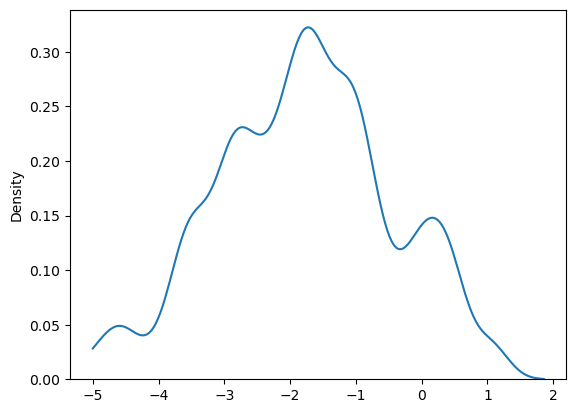

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create multiple datasets for KDEs
n_samples = 100
n_datasets = 50
datasets = [np.random.normal(loc=np.random.uniform(-2, 2), scale=np.random.uniform(0.5, 1.5), size=n_samples) for _ in range(n_datasets)]

# Set up an array to store KDE estimates at each point
x_values = np.linspace(-5, 5, 1000)
kde_values = np.zeros((n_datasets, len(x_values)))

# Calculate KDE for each dataset and store the estimates
for i, data in enumerate(datasets):
    kde = sns.kdeplot(data, bw_adjust=0.5, clip=(-5, 5), fill=False)
    kde_values[i, :] = kde.get_lines()[-1].get_data()[1]  # Get KDE values from the plot object
    plt.cla()  # Clear the current axes after each KDE

# Calculate the envelope (min and max KDE values) at each x-value
kde_min = kde_values.min(axis=0)
kde_max = kde_values.max(axis=0)

# Plot the envelope
plt.fill_between(x_values, kde_min, kde_max, color='skyblue', alpha=0.4, label='KDE Envelope')

# Optional: Plot the mean KDE for reference
kde_mean = kde_values.mean(axis=0)
plt.plot(x_values, kde_mean, color='blue', label='Mean KDE')

# Add labels and show the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Envelope of Multiple KDEs')
plt.legend()
plt.show()


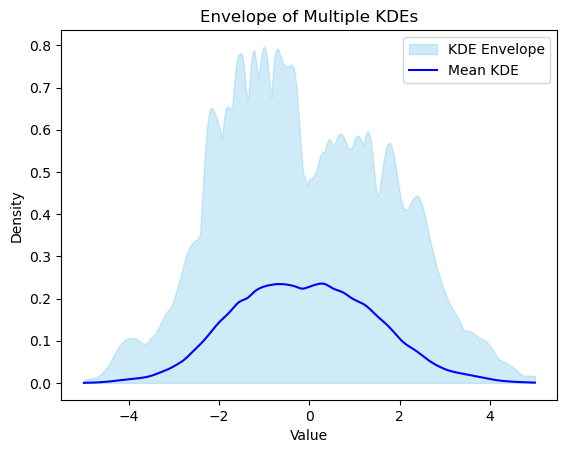

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Create multiple datasets for KDEs
n_samples = 100
n_datasets = 50
datasets = [np.random.normal(loc=np.random.uniform(-2, 2), scale=np.random.uniform(0.5, 1.5), size=n_samples) for _ in range(n_datasets)]

# Set up an array to store KDE estimates at each point
x_values = np.linspace(-5, 5, 1000)
kde_values = np.zeros((n_datasets, len(x_values)))

# Calculate KDE for each dataset and store the estimates
for i, data in enumerate(datasets):
    kde = sns.kdeplot(data, bw_adjust=0.5, clip=(-5, 5), fill=False)
    
    # Extract x and y values from the current plot's KDE
    kde_x, kde_y = kde.get_lines()[-1].get_data()

    # Interpolate the KDE y-values to match the x_values grid
    interp = interp1d(kde_x, kde_y, bounds_error=False, fill_value=0)
    kde_values[i, :] = interp(x_values)  # Interpolate to match the x_values grid
    
    plt.cla()  # Clear the current axes after each KDE

# Calculate the envelope (min and max KDE values) at each x-value
kde_min = kde_values.min(axis=0)
kde_max = kde_values.max(axis=0)

# Plot the envelope
plt.fill_between(x_values, kde_min, kde_max, color='skyblue', alpha=0.4, label='KDE Envelope')

# Optional: Plot the mean KDE for reference
kde_mean = kde_values.mean(axis=0)
plt.plot(x_values, kde_mean, color='blue', label='Mean KDE')

# Add labels and show the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Envelope of Multiple KDEs')
plt.legend()
plt.show()


In [61]:
datasets = [ libpysal.weights.lag_spatial(w, np.random.permutation(y)) for i in range(99)]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [62]:
len(datasets)

99

In [74]:
l60.min(),l60.max()
x_values = np.linspace(l60.min()/2.5, l60.max()*1.5, 100)
x_min = x_values.min()
x_max = x_values.max()
n_datasets = 99
kde_values = np.zeros((n_datasets, len(x_values)))
common_range = (x_min, x_max)


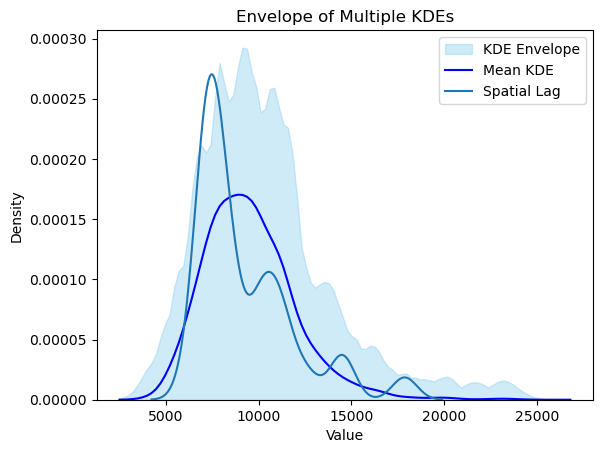

In [76]:
for i, data in enumerate(datasets):
    kde = sns.kdeplot(data, bw_adjust=0.5, clip=(x_min, x_max), fill=False)
    
    kde_x, kde_y = kde.get_lines()[-1].get_data()

    # Interpolate the KDE y-values to match the x_values grid
    interp = interp1d(kde_x, kde_y, bounds_error=False, fill_value=0)
    kde_values[i, :] = interp(x_values)  # Interpolate to match the x_values grid
    
    plt.cla()  # Clear the current axes after each KDE

# Calculate the envelope (min and max KDE values) at each x-value
kde_min = kde_values.min(axis=0)
kde_max = kde_values.max(axis=0)
# Plot the envelope
plt.fill_between(x_values, kde_min, kde_max, color='skyblue', alpha=0.4, label='KDE Envelope')

# Optional: Plot the mean KDE for reference
kde_mean = kde_values.mean(axis=0)
plt.plot(x_values, kde_mean, color='blue', label='Mean KDE')
sns.kdeplot(l60, label='Spatial Lag', bw_adjust=0.5, clip=common_range)


# Add labels and show the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Envelope of Multiple KDEs')
plt.legend()
plt.show()


## Monte Carlo Example

In [81]:
n_samples = 100

k = 10

w = libpysal.weights.lat2W(k,k)
w.transform='r'

In [78]:
rhos = np.arange(0, .9, .1)
rhos

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [86]:
mu = 50
I = np.eye(k*k)
AIS = []
for rho in rhos:
    A = I - rho *w.full()[0]
    AI = np.linalg.inv(A)
    AIS.append(AI)

In [87]:
AI[0:4,0:4]

array([[1.37859246, 0.70986085, 0.25233372, 0.09186194],
       [0.47324057, 1.43289633, 0.48630564, 0.17150269],
       [0.16822248, 0.48630564, 1.35206531, 0.45653987],
       [0.06124129, 0.17150269, 0.45653987, 1.34096643]])

In [102]:
res = {}
permutations = 100
for rho, i in enumerate(rhos):
    for realization in range(n_samples):
        e = np.random.normal(0, 50, size=(k*k,1))
        mue = mu + e
        y =  np.dot(AI, mue)
        wy = libpysal.weights.lag_spatial(w, y)
        counter = 0
        for perm in range(permutations):
            yr = np.random.permutation(y)
            wyr = libpysal.weights.lag_spatial(w, yr)
            result = cramervonmises_2samp(wy, wyr)
            if result.pvalue <= 0.05:
                counter += 1
        res[(rho, realization)] = counter


In [103]:
yr.mean()

np.float64(287.8508507836729)

In [105]:
wy.mean(), wyr.mean()


(np.float64(288.4577613659621), np.float64(289.0009182556533))

In [104]:
res

{(0, 0): 1,
 (0, 1): 2,
 (0, 2): 0,
 (0, 3): 0,
 (0, 4): 11,
 (0, 5): 25,
 (0, 6): 7,
 (0, 7): 0,
 (0, 8): 9,
 (0, 9): 0,
 (0, 10): 31,
 (0, 11): 0,
 (0, 12): 0,
 (0, 13): 5,
 (0, 14): 33,
 (0, 15): 15,
 (0, 16): 0,
 (0, 17): 3,
 (0, 18): 0,
 (0, 19): 1,
 (0, 20): 9,
 (0, 21): 16,
 (0, 22): 0,
 (0, 23): 3,
 (0, 24): 2,
 (0, 25): 1,
 (0, 26): 0,
 (0, 27): 52,
 (0, 28): 31,
 (0, 29): 0,
 (0, 30): 4,
 (0, 31): 98,
 (0, 32): 1,
 (0, 33): 0,
 (0, 34): 5,
 (0, 35): 0,
 (0, 36): 77,
 (0, 37): 87,
 (0, 38): 1,
 (0, 39): 7,
 (0, 40): 0,
 (0, 41): 0,
 (0, 42): 32,
 (0, 43): 30,
 (0, 44): 42,
 (0, 45): 0,
 (0, 46): 0,
 (0, 47): 19,
 (0, 48): 0,
 (0, 49): 33,
 (0, 50): 0,
 (0, 51): 0,
 (0, 52): 0,
 (0, 53): 33,
 (0, 54): 0,
 (0, 55): 35,
 (0, 56): 2,
 (0, 57): 2,
 (0, 58): 0,
 (0, 59): 16,
 (0, 60): 3,
 (0, 61): 33,
 (0, 62): 4,
 (0, 63): 1,
 (0, 64): 4,
 (0, 65): 2,
 (0, 66): 3,
 (0, 67): 0,
 (0, 68): 0,
 (0, 69): 0,
 (0, 70): 8,
 (0, 71): 3,
 (0, 72): 0,
 (0, 73): 69,
 (0, 74): 0,
 (0, 75): 0,
 

In [83]:
A.shape

(100, 100)

In [84]:
A

array([[ 1.        , -0.4       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26666667,  1.        , -0.26666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.26666667,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.26666667,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.26666667,
         1.        , -0.26666667],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.4       ,  1.        ]])

In [106]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 25

# Mean of the desired vector
desired_mean = 60

# Spatial autoregressive parameter
rho = 0.5

# Generate a spatial weights matrix W (e.g., random weights)
W = np.random.rand(n, n)
W = W / W.sum(axis=1)[:, np.newaxis]  # Row-normalize W

# Generate random error term epsilon
sigma = 1  # Standard deviation of the error term
epsilon = np.random.normal(0, sigma, size=(n, 1))

# Simulate y using the SAR equation: y = (I - rho * W)^(-1) * epsilon
I = np.eye(n)
y = np.linalg.inv(I - rho * W) @ epsilon

# Adjust the vector to have a mean of 60
y_adjusted = y - np.mean(y) + desired_mean

# Reshape to ensure it's a 25x1 vector
y_adjusted = y_adjusted.reshape((n, 1))

# Print the simulated vector
print("Simulated vector with mean 60:")
print(y_adjusted)
print(f"Mean of the simulated vector: {np.mean(y_adjusted)}")


Simulated vector with mean 60:
[[59.50335141]
 [57.96317815]
 [61.08512045]
 [59.10510888]
 [60.21937925]
 [61.00814328]
 [59.16297447]
 [60.28034152]
 [61.69432809]
 [57.71526519]
 [59.38207926]
 [59.20458413]
 [60.08153114]
 [60.1698427 ]
 [59.01124681]
 [59.48614337]
 [59.43299963]
 [59.85719209]
 [60.39571047]
 [61.12774218]
 [61.23385475]
 [60.81496405]
 [59.33564438]
 [60.17891651]
 [62.55035785]]
Mean of the simulated vector: 60.0


In [125]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 25

# Desired mean and standard deviation
desired_mean = 60
desired_std = 30

# Spatial autoregressive parameter
rho = 0.8

# Generate a spatial weights matrix W (e.g., random weights)
W = np.random.rand(n, n)
W = W / W.sum(axis=1)[:, np.newaxis]  # Row-normalize W
W = libpysal.weights.lat2W(5,5)
W.transform = 'r'
W = W.full()[0]

# Generate random error term epsilon
sigma = 1  # Standard deviation of the error term
epsilon = np.random.normal(0, sigma, size=(n, 1))

# Simulate y using the SAR equation: y = (I - rho * W)^(-1) * epsilon
I = np.eye(n)
y = np.linalg.inv(I - rho * W) @ epsilon

# Step 1: Adjust to have the desired standard deviation
current_std = np.std(y)
y_scaled = y * (desired_std / current_std)

# Step 2: Adjust to have the desired mean
current_mean = np.mean(y_scaled)
y_adjusted = y_scaled - current_mean + desired_mean

# Reshape to ensure it's a 25x1 vector
y_adjusted = y_adjusted.reshape((n, 1))

# Print the simulated vector
print("Simulated vector with mean 60 and standard deviation 30:")
print(y_adjusted)
print(f"Mean of the simulated vector: {np.mean(y_adjusted)}")
print(f"Standard deviation of the simulated vector: {np.std(y_adjusted)}")


Simulated vector with mean 60 and standard deviation 30:
[[ 30.34774906]
 [  5.61321136]
 [ 64.31617731]
 [ 47.16960984]
 [ 40.69502379]
 [ 61.29060489]
 [ 29.48728248]
 [ 64.93173035]
 [ 85.3314396 ]
 [ 13.08798606]
 [ 37.80721574]
 [ 31.9878886 ]
 [ 57.51533994]
 [ 70.09962914]
 [ 45.85430486]
 [ 48.74656631]
 [ 44.79416714]
 [ 58.99032309]
 [ 86.42163388]
 [107.68137292]
 [ 88.82310993]
 [ 80.87627414]
 [ 60.92027067]
 [ 93.55725214]
 [143.65383678]]
Mean of the simulated vector: 60.0
Standard deviation of the simulated vector: 30.000000000000004


In [126]:
import esda

In [127]:
w = libpysal.weights.lat2W(5,5)
w.transform = 'r'

In [128]:
res = esda.moran.Moran(y, w)

In [129]:
res.I

np.float64(0.46970954423793404)

In [130]:
res.p_norm

np.float64(0.0006645744943399919)

In [131]:
wy = libpysal.weights.lag_spatial(w, y_adjusted)

In [132]:
wy

array([[ 33.45190812],
       [ 41.38373628],
       [ 39.23818385],
       [ 63.4475469 ],
       [ 30.12879795],
       [ 32.54741576],
       [ 40.9558588 ],
       [ 59.16255983],
       [ 48.82223884],
       [ 57.29358942],
       [ 47.3416866 ],
       [ 42.40100132],
       [ 56.50239279],
       [ 68.78067957],
       [ 63.62299604],
       [ 57.1414976 ],
       [ 55.15026303],
       [ 62.41285291],
       [ 82.58214432],
       [ 91.97659184],
       [ 64.81142022],
       [ 64.84584925],
       [ 77.80794979],
       [ 96.99858044],
       [100.61931253]])

In [133]:
wyr = libpysal.weights.lag_spatial(w, np.random.permutation(y_adjusted))

In [134]:
wyr

array([[39.57874922],
       [45.79804245],
       [78.97744342],
       [65.61006938],
       [75.05685741],
       [32.54741576],
       [57.10613664],
       [68.50510947],
       [76.71388441],
       [63.6822521 ],
       [36.76605371],
       [59.68093082],
       [56.82169114],
       [86.60776913],
       [53.63380636],
       [53.4911186 ],
       [47.24513808],
       [93.24792464],
       [46.43915145],
       [70.89752468],
       [59.2178053 ],
       [72.18241354],
       [58.19952244],
       [78.2660102 ],
       [53.8684447 ]])

In [140]:
ks_2samp(wyr, wy)

KstestResult(statistic=array([0.16]), pvalue=array([0.91499322]), statistic_location=array([42.40100132]), statistic_sign=array([-1.]))

In [141]:
wy.mean(), wyr.mean()

(np.float64(59.17708216045005), np.float64(61.205650601843516))

In [142]:
wy.std(), wyr.std()

(np.float64(19.124769670399136), np.float64(15.18306374176247))

In [138]:
result = cramervonmises_2samp(wy, wyr)

In [139]:
result

CramerVonMisesResult(statistic=[0.0712], pvalue=[0.77119716])

In [143]:
import inequality.gini

In [144]:
from inequality.gini import Gini

In [146]:
Gini(wy).g

np.float64(13.65740614902654)

In [147]:
Gini(wyr).g

np.float64(15.772948960181928)

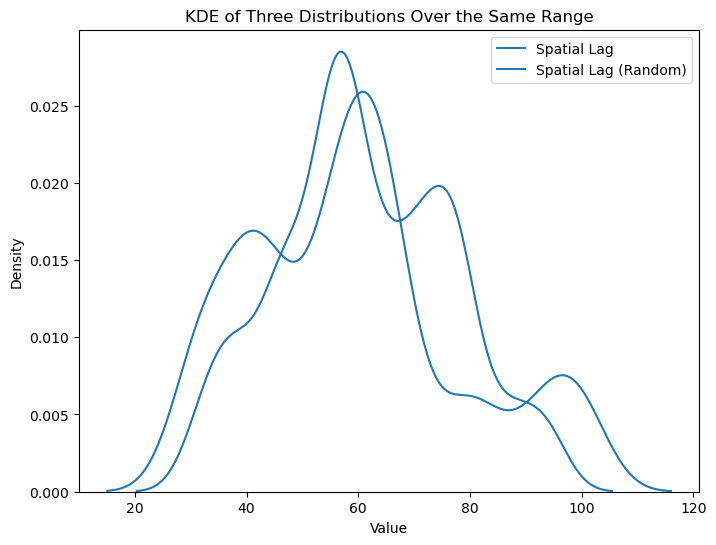

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate two sets of random data
data1 = np.random.normal(0, 1, size=1000)
data2 = np.random.normal(2, 0.5, size=1000)

# Set the same range for both KDE plots
y = gdf.PCGDP1960
common_range = (min(wy.min(), wyr.min()) *.5, 1.5*max(wy.max(), wyr.max()))

# Create the plot
plt.figure(figsize=(8, 6))


# Plot the second KDE
sns.kdeplot(wy, label='Spatial Lag', bw_adjust=0.5, clip=common_range)

# Plot the random lag
sns.kdeplot(wyr, label='Spatial Lag (Random)', bw_adjust=0.5, clip=common_range)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE of Three Distributions Over the Same Range')
plt.legend()

# Show the plot
plt.show()


In [157]:
wolfson(wy), wolfson(wyr)

(np.float64(-13.86162796406077), np.float64(-16.252926813534494))

In [158]:
wolfson??

<unknown>:2: SyntaxWarning: invalid escape sequence '\m'


Signature: wolfson(income_distribution)
Source:   
def wolfson(income_distribution):
    """
    Calculate the Wolfson Bipolarization Index for a given income distribution.


    The Wolfson index is constructed from the polarization curve,
    which is a rotation and rescaling of the Lorenz curve by the
    median income:

    .. math::

       W = (2D_{50} - G)\\frac{\\mu}{m}

    Where :math:`D_{50} =0.5 - L(0.5)`, :math:`L(0.5)` is the
    value of the Lorenz curve at the median, :math:`G` is the Gini
    index, :math:`\mu` is the mean, and :math:`m` is the median.

    
    See :cite:t:`wolfson1994WhenInequalities,hoffmann2024MeasuringMismeasuring`.

    

    Parameters
    ----------
    income_distribution : list of int or float
        A list representing the income distribution.

    Returns
    -------
    w: float
        The Wolfson Bipolarization Index value.

    Example
    -------
    >>> income_distribution = [20000, 25000, 27000, 30000, 35000, 45000, 60000,
    ...  